In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../codes/")))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../codes/scpy2/")))

from scpy2.utils.nbmagics import install_magics
install_magics()
del install_magics

D:\Program_File\VSCode_Portable\workon_env\pyElan\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(
d:\09_Work\Jun_Workspace\Python_Scientific_Computing_Best_Practices\繁中程式碼\codes\scpy2\utils\program_finder.py:25: UserWarning: Inkscape not found
  warnings.warn("Inkscape not found")


In [2]:
import numpy as np
%matplotlib_svg

## 龐大的函數庫

### 隨機數

表2-3 本節介紹的函數

| 函數名稱 | 功能 |
|---------|------|
| rand() | 0 到 1 之間的亂數 |
| randn() | 標準正態分佈的亂數 |
| randint() | 指定範圍內的隨機整數 |
| normal() | 正態分佈 |
| uniform() | 均勻分佈 |
| poisson() | 卜松分佈 |
| permulation() | 隨機排列 |
| shuffle() | 隨機打亂順序 |
| choice() | 隨機取出樣本 |
| seed() | 設定亂數種子 |

`numpy.random` 模組中提供了大量的亂數相關的函數，為了方便後面用亂數測試各種運算函數，讓我們首先來看看如何產生亂數：
- `rand()`：產生 0 到 1 之間的隨機浮點數，它的所有參數用於指定所產生的陣列的形狀。
- `randn()`：產生標準正態分佈的亂數，參數的含義與 `rand()` 相同。
- `randint()`：產生指定範圍的隨機整數，包含起始值，但是不包含終值，在下面的實例中，產生 0 到 9 的亂數，它的第三個參數用於指定陣列的形狀。

In [3]:
from numpy import random as nr
np.set_printoptions(precision=2) # 為了節省篇幅，只顯示小數點後兩位數字
r1 = nr.rand(4, 3)
r2 = nr.randn(4, 3)
r3 = nr.randint(0, 10, (4, 3))

%C r1; r2; r3

         r1                      r2                 r3    
--------------------  -----------------------  -----------
[[0.96, 0.24, 0.56],  [[ 0.38, -0.78,  0.37],  [[5, 9, 0],
 [0.58, 0.86, 0.14],   [ 0.53, -0.77,  0.82],   [0, 5, 2],
 [0.58, 0.38, 0.1 ],   [-0.72,  0.58,  0.06],   [1, 1, 2],
 [0.29, 0.36, 0.74]]   [-2.15, -0.31, -1.1 ]]   [7, 6, 5]]


`random` 模組提供了許多產生符合特定隨機分佈的亂數的函數，它們的最後一個參數 `size` 都用於指定輸出陣列的形狀，而其他參數都是分佈函數的參數。例如：
- `normal()`：正態分佈，前兩個參數分別為 期望值 和 標準差。
- `uniform()`：均勻分佈，前兩個參數分別為區間的 起始值 和 終值。
- `poisson()`：卜松分佈，第一個參數指定 $lambda$ 係數，它表示單位時間(或單位面積)內隨機事件的平均發生率。由於卜松分佈是一個離散分佈，因此它輸出的陣列是一個整數陣列。

In [4]:
r1 = nr.normal(100, 10, (4, 3))
r2 = nr.uniform(10, 20, (4, 3))
r3 = nr.poisson(2.0, (4, 3))

%C r1; r2; r3

            r1                         r2                 r3    
--------------------------  -----------------------  -----------
[[111.53, 102.91,  97.56],  [[12.35, 16.62, 15.9 ],  [[0, 3, 2],
 [103.97, 111.05, 110.19],   [13.1 , 17.61, 15.28],   [1, 2, 1],
 [117.46, 105.73, 115.5 ],   [10.62, 11.83, 14.8 ],   [0, 2, 1],
 [103.57, 100.5 ,  96.56]]   [17.77, 16.01, 17.24]]   [4, 2, 0]]


`permutation()` 可以用於產生一個亂數組，當參數為整數 n 時，它傳回 `[0,n)` 這 n 個整數的隨機排列；當參數為一個序列時，它傳回一個隨機排列之後的序列：

In [5]:
a = np.array([1, 10, 20, 30, 40])
print( nr.permutation(10) )
print( nr.permutation(a) )

[0 8 9 5 3 2 1 7 4 6]
[20 40 10 30  1]


`permutation()` 傳回一個新陣列，而 `shuffle()` 則直接將參數陣列的順序打亂：

In [6]:
nr.shuffle(a)
a

array([20, 30, 40,  1, 10])

`choice()` 從指定的樣本中隨機進行取出：
- `size` 參數用於指定輸出陣列的形狀。
- `replace` 參數為 True 時，進行可重複取出，而為 False 時進行不重複取出，預設值為 True。所以在下面的實例中，c1 中可能有重複數值，而 c2 中的每個數值都是不同的。
- `p` 參數指定每個元素對應的取出機率，如果不指定，所有的元素被取出到的機率相同。在下面的實例中，值越大的元素被抽到的機率越大，因此 c3 中數值較大的元素比較多。

In [7]:
a = np.arange(10, 25, dtype=float)
c1 = nr.choice(a, size=(4, 3))
c2 = nr.choice(a, size=(4, 3), replace=False)
c3 = nr.choice(a, size=(4, 3), p=a / np.sum(a))

%C c1; c2; c3

        c1                 c2                 c3       
-----------------  -----------------  -----------------
[[14., 21., 17.],  [[17., 12., 14.],  [[24., 16., 14.],
 [13., 16., 15.],   [18., 22., 23.],   [11., 19., 23.],
 [20., 20., 23.],   [10., 21., 15.],   [21., 20., 10.],
 [22., 20., 10.]]   [24., 11., 16.]]   [18., 16., 22.]]


為了確保每次執行時期能重現相同的亂數，可以透過 `seed()` 函數指定亂數的種子。在下面實例中，計算 r3 和 r4 之前，都使用 42 作為種子，因此獲得的亂數組是相同的：

In [8]:
r1 = nr.randint(0, 100, 3)
r2 = nr.randint(0, 100, 3)
nr.seed(42)
r3 = nr.randint(0, 100, 3)
nr.seed(42)
r4 = nr.randint(0, 100, 3)
%C r1; r2; r3; r4

     r1            r2            r3            r4     
------------  ------------  ------------  ------------
[72,  4, 21]  [72, 17, 15]  [51, 92, 14]  [51, 92, 14]


### 求和、平均值、方差

表2-4 本節要介紹的函數
| 函數名稱 | 功能 |
|---------|------|
| sum() | 求和 |
| mean() | 求平均 |
| average() | 加權平均數 |
| std() | 標準差 |
| var() | 方差 |
| product() | 連乘積 |

`sum()` 計算陣列元素之和，也可以對列表、元組等與陣列類似的序列進行求和。當陣列是多維時，它計算陣列中所有元素的和。這裡使用 `random.randint()` 模組中的函數建立一個隨機整數陣列。

In [9]:
np.random.seed(42)
a = np.random.randint(0,10,size=(4,5))
%C a; np.sum(a)

        a          np.sum(a)
-----------------  ---------
[[6, 3, 7, 4, 6],  96       
 [9, 2, 6, 7, 4],           
 [3, 7, 7, 2, 5],           
 [4, 1, 7, 5, 1]]           


如果指定 `axis` 參數，則求和運算沿著指定的軸進行。在上面的實例中，陣列 a 的第 0 軸的長度為 4，第 1 軸的長度為 5。  
如果 `axis` 參數為 1，則對每行上的 5 個數求和，所得的結果是長度為 4 的一維陣列。  
如果 `axis` 參數為 0，則對每列上的 4 個數求和，所得的結果是長度為 5 的一維陣列。  
即結果陣列的形狀是原始陣列的形狀除去其第 `axis` 個元素：

In [10]:
%C np.sum(a, axis=1); np.sum(a, axis=0)

np.sum(a, axis=1)   np.sum(a, axis=0)  
-----------------  --------------------
[26, 28, 24, 18]   [22, 13, 27, 18, 16]


當 `axis` 參數是一個軸的序列時，對指定的所有軸進行求和運算。例如下面的程式對一個形狀為 (2,3,4) 的 3D 陣列的第 0 和第 2 軸求和，獲得的結果為一個形狀為 (3,) 的陣列。由於陣列的所有元素都為 1，因此求和的結果都是 8：

In [11]:
np.sum(np.ones((2, 3, 4)), axis=(0, 2))

array([8., 8., 8.])

有時我們希望能夠保持原陣列的維數，這時可以設定 `keepdims` 參數為 True：

In [12]:
%C np.sum(a, 1, keepdims=True); np.sum(a, 0, keepdims=True)

np.sum(a, 1, keepdims=True)  np.sum(a, 0, keepdims=True)
---------------------------  ---------------------------
[[26],                       [[22, 13, 27, 18, 16]]     
 [28],                                                  
 [24],                                                  
 [18]]                                                  


`sum()` 預設使用陣列的元素類相同的累加變數進行計算，如果元素類型為整數，則使用系統的預設整數類型作為累加變數，例如在 32 位元系統中使用 32 位元整數作為累加變數。因此對整數陣列進行累加時可能會出現溢出問題，即陣列元素的總和超過了累加變數的設定值範圍。下面的程式計算陣列 a 中每個元素佔其所在行總和的百分比。呼叫 `sum()` 函數時：
- 設定 `dtype` 參數為 float，這樣獲得的結果是浮點陣列，能避免整數的整除運算。
- 設定 `keepdims` 參數為 True，這樣 `sum()` 獲得的結果的形狀為 (4, 1) ，能夠和原始陣列進行廣播運算。

In [13]:
pa = a / np.sum(a, 1, dtype=float, keepdims=True) * 100
%C 2 pa; pa.sum(1, keepdims=True)

                  pa                   pa.sum(1, keepdims=True)
-------------------------------------  ------------------------
[[23.08, 11.54, 26.92, 15.38, 23.08],  [[100.],                
 [32.14,  7.14, 21.43, 25.  , 14.29],   [100.],                
 [12.5 , 29.17, 29.17,  8.33, 20.83],   [100.],                
 [22.22,  5.56, 38.89, 27.78,  5.56]]   [100.]]                


對很大的單精度浮點數類型的陣列進行計算時，也可能出現精度不夠的現象，這時也可以透過 `dtype` 參數指定累加變數的類型。在下面的實例中，對一個元素都為 1.1 的單精度陣列進行求和，比較單精度累加變數和雙精度累加變數的計算結果：

In [14]:
np.set_printoptions(precision=8)
b = np.full(1000000, 1.1, dtype=np.float32) # 建立一個很大的單精度浮點數群組
b # 1.1無法使用浮點數精確表示，存在一些誤差

array([1.1, 1.1, 1.1, ..., 1.1, 1.1, 1.1], dtype=float32)

使用單精度累加變數進行累加計算，誤差將越來越大，而使用雙精度浮點數則能夠獲得較精確的結果：

In [15]:
%C np.sum(b); np.sum(b, dtype=np.double)

np.sum(b)  np.sum(b, dtype=np.double)
---------  --------------------------
1099999.2  1100000.023841858         


上面的實例將產生一個新的陣列來儲存求和的結果，如果希望將結果直接儲存到另一個陣列中，可以和 ufunc 函數一樣使用 `out` 參數指定輸出陣列，它的形狀必須和結果陣列的形狀相同。

`mean()` 求陣列的平均值，它的參數與 `sum()` 相同。和 `sum()` 不同的是：對於整數陣列它使用雙精度浮點數進行計算，而對於其他類型的陣列，則使用和陣列元素類型相同的累加變數進行計算：

In [16]:
np.mean(a, axis=1) # 整數群組使用雙精度浮點數進行計算

array([5.2, 5.6, 4.8, 3.6])

`average()` 可以對陣列進行平均計算。它沒有 `out` 和 `dtype` 參數，但有一個指定每個元素權重的 `weights` 參數，可以用於計算加權平均數。例如有三個班級，number 陣列中儲存每個班級的人數，score 陣列中儲存每個班級的平均分，下面計算所有班級的加權平均分，獲得整個年級的平均分：

In [17]:
%C np.mean(b); np.mean(b, dtype=np.double)

np.mean(b)  np.mean(b, dtype=np.double)
----------  ---------------------------
1.0999993   1.100000023841858          


In [18]:
score = np.array([83, 72, 79])
number = np.array([20, 15, 30])
print( np.average(score, weights=number) )

78.61538461538461


相當於進行以下計算：

In [19]:
print( np.sum(score * number) / np.sum(number, dtype=float) )

78.61538461538461


`std()` 和 `var()` 分別計算陣列的標準差和方差，有 `axis`, `out`, `dtype`, `keepdims` 等參數。

方差有兩種定義：偏樣本方差(biased sample variance)和無偏樣本方差(unbiased sample variance)。偏樣本方差的計算公式為：

$s_n^2=\frac{1}{n}\sum_{i=1}^{n}(y_i-\bar{y})^2$

而無偏樣本方差的公式為:

$s^2=\frac{1}{n-1}\sum_{i=1}^{n}(y_i-\bar{y})^2$

當 `ddof` 參數為 0 時，計算偏樣本方差；當 `ddof` 為 1 時，計算無偏樣本方差，預設值為 0。下面我們用程式示範這兩種方差的差別。

首先產生一個標準差為 2.0、方差為 4.0 的正態分佈的亂數組。我們可以認為整數樣本的方差為 4.0。假設從整數樣本中隨機取出 10 個樣本，我們分別計算這 10 個樣本的兩種方差，這裡我們用一個二維陣列重複上述作 100000 次，然後計算所有這些方差的期望值：



In [20]:
a = nr.normal(0, 2.0, (100000, 10)) 
v1 = np.var(a, axis=1, ddof=0) #可以省略ddof=0
v2 = np.var(a, axis=1, ddof=1)
%C np.mean(v1); np.mean(v2)

   np.mean(v1)         np.mean(v2)   
------------------  -----------------
3.6008566906846693  4.000951878538522


可以看到無偏樣本方差的期望值接近於整體方差 4.0，而偏樣本方差比 4.0 小一些。

偏樣本方差是正態分佈隨機變數的最大似然估計。如果有一個樣本包含 n 個亂數，並且知道它們符合正態分佈，透過該樣本可以估算出正態分佈的機率密度函數的參數。所估算的那組正態分佈參數最符合指定的樣本，就稱為最大似然估計。

下態分佈的機率密度函數的定義如下，其中 $\mu$ 表示期望，$\sigma^2$ 表示方差：

$f(x | \mu, \sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

所謂最大似然估計，就是找到一組參數使得下面的乘積最大，其中 $x_i$ 為樣本中的值：

$f(x_1)f(x_2)...f(x_n)$

專業術語總是很難了解，下面我們還是用程式來驗證：


In [21]:
def normal_pdf(mean, var, x):
    return 1 / np.sqrt(2 * np.pi * var) * np.exp(-(x - mean) ** 2 / (2 * var))

nr.seed(42)
data = nr.normal(0, 2.0, size=10)                         #❶
mean, var = np.mean(data), np.var(data)                   #❷
var_range = np.linspace(max(var - 4, 0.1), var + 4, 100)  #❸

p = normal_pdf(mean, var_range[:, None], data)            #❹
p = np.product(p, axis=1)                                 #❺

`normal_pdf()` 為計算正態分佈的機率密度的函數。  
❶ 產生 10 個正態分佈的亂數。  
❷ 計算其最大似然估計的參數。  
❸ 以最似然估計的方差為中心，產生一組方差值。  
❹ 用正態分佈的機率密度函數計算每個樣本、每個方差所對應的機率密度。由於使用了廣播運算，獲得的結果 p 是一個二維陣列，它的第 0 軸對應 var_range 中的各個方差，第 1 軸對應 data 中的每個元素。
❺ 沿著 p 的第 1 軸求所有機率密度的乘積。`product()` 和 `sum()` 的用法類似，用於計算陣列所有元素的乘積。  

下面繪製 var_range 中各個方差對應的似然估計值，並用一條分隔號表示偏樣本方差。由圖2-8(下圖)可以看到偏樣本方差位於似然估計曲線的最大值處。

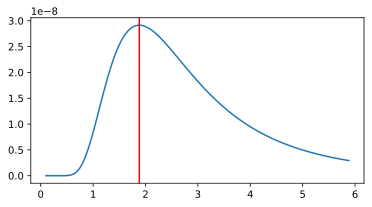

In [22]:
#%fig=偏樣本方差位於似然估計曲線的最大值處
import pylab as pl
pl.plot(var_range, p)
pl.axvline(var, 0, 1, c="r")
pl.show()